# Projeto Cluster - Quiz Casal Próspero

In [1]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express.colors as pcolors
from plotly.colors import qualitative
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings('ignore')

# Carregando e Explorando os Dados

In [2]:
# Carrega os datasets
df_01 = pd.read_csv('leads_funil-casamento_df1.csv')
df_02 = pd.read_csv('leads_funil-casamento_df2.csv')
df_03 = pd.read_csv('leads_funil-casamento_df3.csv')

## Análise Exploratória

Limpando df01 e df02

In [3]:
## Amostra de 5 linhas do df01
df_01.sample(5)

,code,created_at,button: oQcJxV,options: opcoes_UAa9JQ,button: 0FvZw6,options: opcoes_KxEbYn,options: opcoes_iSdQa9,options: opcoes_GZPJo1,options: opcoes_n5nnNG,options: opcoes_G7CtE4,options: opcoes_euOjgt,options: opcoes_3FPmNX,options: opcoes_kGxmr1,field: 11ABFZ,field: 3hxWeL,field: 5fSLVc,button: enviar,tracking
315,0yId7t,04/05/2025 21:36:25,clicked,NaN,NaN,"(B) Temos algumas referências, mas nada decidido",(A) Vivemos no limite e temos dívidas,"(A) Está completamente envolvido(a), sonha jun...",(A) Não começamos ainda,(A) Não conseguiríamos bancar nada ainda,"(D) Um evento inesquecível, com tudo que temos...","(B) Pensamos, mas parece fora da nossa realidade","(B) Queremos muito, mas temos medo de não dar ...",Hanna,hanna050798@gmail.com,21975588227,clicked,utm_source: MA-120220925670300172 | utm_medium...
52,VLgRqt,01/05/2025 19:40:48,clicked,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,utm_source: MA-120220925670300172 | utm_medium...
148,knA4LK,02/05/2025 19:43:30,NaN,NaN,clicked,(D) Sabemos exatamente o que queremos e já com...,(A) Vivemos no limite e temos dívidas,"(A) Está completamente envolvido(a), sonha jun...","(D) Temos planilhas, metas e até cronograma de...",(C) Teríamos que parcelar bastante ou contar c...,"(C) Uma cerimônia encantadora, com tudo bem feito","(C) Temos destinos em mente, mas sem orçamento...","(D) Estamos prontos, queremos agir e realizar ...",NaN,NaN,NaN,NaN,utm_source: MA-120220925670300172 | utm_medium...
197,9LV80U,03/05/2025 15:28:09,clicked,NaN,NaN,(A) Ainda estamos completamente perdidos sobre...,"(D) Estamos bem financeiramente, mas queremos ...","(A) Está completamente envolvido(a), sonha jun...",(A) Não começamos ainda,"(D) Poderíamos arcar com boa parte, mas querem...","(B) Algo íntimo e simples, só com pessoas próx...",(A) Nem pensamos nisso ainda,"(A) Desejamos, mas nos falta tempo e direção",NaN,NaN,NaN,NaN,utm_source: MA-120220925670300172 | utm_medium...
185,1lksDl,03/05/2025 12:05:26,clicked,NaN,NaN,(D) Sabemos exatamente o que queremos e já com...,"(B) Conseguimos nos manter, mas não sobra","(B) Está envolvido(a), mas prefere que eu lidere",(B) Temos anotações e ideias soltas,(A) Não conseguiríamos bancar nada ainda,"(B) Algo íntimo e simples, só com pessoas próx...","(B) Pensamos, mas parece fora da nossa realidade","(B) Queremos muito, mas temos medo de não dar ...",NaN,NaN,NaN,NaN,utm_source: MA-120220925670300172 | utm_medium...


In [4]:
# Contagem de cada coluna df01
df_01.count()

code                      353
created_at                353
button: oQcJxV            331
options: opcoes_UAa9JQ      0
button: 0FvZw6             22
options: opcoes_KxEbYn    260
options: opcoes_iSdQa9    249
options: opcoes_GZPJo1    235
options: opcoes_n5nnNG    227
options: opcoes_G7CtE4    223
options: opcoes_euOjgt    220
options: opcoes_3FPmNX    220
options: opcoes_kGxmr1    218
field: 11ABFZ              74
field: 3hxWeL              74
field: 5fSLVc              74
button: enviar             74
tracking                  341
dtype: int64

In [5]:
# Contagem de cada coluna df02
df_02.count()

code                      162
created_at                162
button: oQcJxV            120
options: opcoes_UAa9JQ      0
button: 0FvZw6             41
options: opcoes_KxEbYn    142
options: opcoes_iSdQa9    142
options: opcoes_GZPJo1    138
options: opcoes_n5nnNG    138
options: opcoes_G7CtE4    137
options: opcoes_euOjgt    136
options: opcoes_3FPmNX    135
options: opcoes_kGxmr1    135
field: 11ABFZ              63
field: 3hxWeL              63
field: 5fSLVc              63
button: enviar             63
tracking                  154
dtype: int64

## Limpeza dos Dados 

As colunas created_at options: opcoes_UAa9JQ, code,button: oQcJxV, button: 0FvZw6,  button: enviar e tracking não contem informações relevantes para a analise portanto podemos remove-las do df01 e df02, as colunas , field: 11ABFZ,field: 3hxWeL, field: 5fSLVc possuem dados sobre o lead, porém possuem poucos dados para se trablhar portanto vamos remove-las também dos df.

In [6]:
# Remoção das colunas definidas nos df01 e df02
df_01 = df_01.drop(columns=["created_at","options: opcoes_UAa9JQ","code", "button: oQcJxV", "button: 0FvZw6", "field: 11ABFZ", "field: 3hxWeL","field: 5fSLVc", "button: enviar", "tracking"])
df_02 = df_02.drop(columns=["created_at","options: opcoes_UAa9JQ","code", "button: oQcJxV", "button: 0FvZw6", "field: 11ABFZ", "field: 3hxWeL","field: 5fSLVc", "button: enviar", "tracking"])

In [7]:
## Amostra de 10 linhas do df01
df_01.sample(5)

,options: opcoes_KxEbYn,options: opcoes_iSdQa9,options: opcoes_GZPJo1,options: opcoes_n5nnNG,options: opcoes_G7CtE4,options: opcoes_euOjgt,options: opcoes_3FPmNX,options: opcoes_kGxmr1
277,(D) Sabemos exatamente o que queremos e já com...,(A) Vivemos no limite e temos dívidas,"(C) Me apoia, mas não se envolve muito com o p...","(C) Criamos um planejamento inicial, mas ainda...",(A) Não conseguiríamos bancar nada ainda,"(B) Algo íntimo e simples, só com pessoas próx...","(C) Temos destinos em mente, mas sem orçamento...","(A) Desejamos, mas nos falta tempo e direção"
127,(D) Sabemos exatamente o que queremos e já com...,(A) Vivemos no limite e temos dívidas,"(C) Me apoia, mas não se envolve muito com o p...","(C) Criamos um planejamento inicial, mas ainda...",(B) Conseguiríamos fazer algo simples,"(C) Uma cerimônia encantadora, com tudo bem feito",(A) Nem pensamos nisso ainda,"(C) Estamos dispostos, só falta um plano eficaz"
44,(D) Sabemos exatamente o que queremos e já com...,"(B) Conseguimos nos manter, mas não sobra","(A) Está completamente envolvido(a), sonha jun...","(C) Criamos um planejamento inicial, mas ainda...",(B) Conseguiríamos fazer algo simples,"(C) Uma cerimônia encantadora, com tudo bem feito","(B) Pensamos, mas parece fora da nossa realidade",NaN
162,(D) Sabemos exatamente o que queremos e já com...,"(C) Temos folga, mas ainda não vivemos como go...","(A) Está completamente envolvido(a), sonha jun...","(C) Criamos um planejamento inicial, mas ainda...",(B) Conseguiríamos fazer algo simples,"(B) Algo íntimo e simples, só com pessoas próx...","(C) Temos destinos em mente, mas sem orçamento...","(D) Estamos prontos, queremos agir e realizar ..."
200,"(C) Já temos o estilo em mente, mas falta plan...","(B) Conseguimos nos manter, mas não sobra",NaN,NaN,NaN,NaN,NaN,NaN


Vamos remover as colunas: 
code
button: oQcJxV
options: opcoes_UAa9JQ
button: 0FvZw6
options: opcoes_PhNxWH
options: opcoes_NMBS1J
options: opcoes_Peavhn
options: opcoes_RyUh7O
options: opcoes_S8x7OR
options: opcoes_MNd05q
options: opcoes_AQo3UU
options: opcoes_yYueg1
field: 11ABFZ
field: 3hxWeL
field: 5fSLVc
button: enviar
tracking

Pelos mesmos motivos da remoção das colunas do df1 e df02

In [8]:
# Remoção das colunas definidas do df03
df_03 = df_03.drop(columns=["created_at","code", "button: oQcJxV","options: opcoes_UAa9JQ","button: 0FvZw6",
                            "button: 0FvZw6", "options: opcoes_PhNxWH", "options: opcoes_NMBS1J", "options: opcoes_Peavhn",
                            "options: opcoes_RyUh7O", "options: opcoes_S8x7OR", "options: opcoes_MNd05q", "options: opcoes_AQo3UU",
                            "options: opcoes_yYueg1","field: 11ABFZ", "field: 3hxWeL","field: 5fSLVc", "button: enviar", "tracking"])

Agora os três df tem as mesmas colunas, vamos renomea-las e concatenar os dataframes

In [9]:
# Dicionário de renomeação das colunas
rename_dict = {
    'options: opcoes_KxEbYn': 'pergunta_1',
    'options: opcoes_iSdQa9': 'pergunta_2',
    'options: opcoes_GZPJo1': 'pergunta_3',
    'options: opcoes_n5nnNG': 'pergunta_4',
    'options: opcoes_G7CtE4': 'pergunta_5',
    'options: opcoes_euOjgt': 'pergunta_6',
    'options: opcoes_3FPmNX': 'pergunta_7',
    'options: opcoes_kGxmr1': 'pergunta_8'
}

# Renomear colunas para df_01
df_01 = df_01.rename(columns=rename_dict)
df_02 = df_02.rename(columns=rename_dict)
df_03 = df_03.rename(columns=rename_dict)

# Concatenar os dataframes
df_gf = pd.concat([df_01, df_02, df_03], ignore_index=True)

In [10]:
# Amostra do df limpo e concatenado
df_gf.sample(5)

,pergunta_1,pergunta_2,pergunta_3,pergunta_4,pergunta_5,pergunta_6,pergunta_7,pergunta_8
599,Ainda estamos completamente perdidos sobre tudo,Vivemos no limite e temos dívidas,Prefere que eu resolva tudo sozinho(a),Temos anotações e ideias soltas,Não conseguiríamos bancar nada ainda,"Um evento inesquecível, com tudo que temos dir...","Temos destinos em mente, mas sem orçamento ainda","Desejamos, mas nos falta tempo e direção"
181,"(B) Temos algumas referências, mas nada decidido",(A) Vivemos no limite e temos dívidas,"(A) Está completamente envolvido(a), sonha jun...",(A) Não começamos ainda,(B) Conseguiríamos fazer algo simples,"(C) Uma cerimônia encantadora, com tudo bem feito",(A) Nem pensamos nisso ainda,"(A) Desejamos, mas nos falta tempo e direção"
237,"(B) Temos algumas referências, mas nada decidido",(A) Vivemos no limite e temos dívidas,"(A) Está completamente envolvido(a), sonha jun...",(A) Não começamos ainda,(A) Não conseguiríamos bancar nada ainda,(A) Ainda não pensamos nisso,(A) Nem pensamos nisso ainda,"(A) Desejamos, mas nos falta tempo e direção"
299,"(C) Já temos o estilo em mente, mas falta plan...",(A) Vivemos no limite e temos dívidas,(D) Prefere que eu resolva tudo sozinho(a),(A) Não começamos ainda,(B) Conseguiríamos fazer algo simples,"(B) Algo íntimo e simples, só com pessoas próx...","(C) Temos destinos em mente, mas sem orçamento...","(B) Queremos muito, mas temos medo de não dar ..."
188,"(C) Já temos o estilo em mente, mas falta plan...",(A) Vivemos no limite e temos dívidas,(D) Prefere que eu resolva tudo sozinho(a),(B) Temos anotações e ideias soltas,(C) Teríamos que parcelar bastante ou contar c...,"(B) Algo íntimo e simples, só com pessoas próx...",(A) Nem pensamos nisso ainda,"(B) Queremos muito, mas temos medo de não dar ..."


Percebemos que existem resposta com a letra A/B/C/D antes da resposta e outras respostas não a possuem, precisamos mapear ambos os cenários

In [11]:
# Dicionário para mapear respostas com letra
mapeamento_com_letra = {
    '(A) Ainda estamos completamente perdidos sobre tudo': 'A',
    '(B) Temos algumas referências, mas nada decidido': 'B',
    '(C) Já temos o estilo em mente, mas falta planejar': 'C',
    '(D) Sabemos exatamente o que queremos e já começamos a organizar': 'D',

    '(A) Vivemos no limite e temos dívidas': 'A',
    '(B) Conseguimos nos manter, mas não sobra': 'B',
    '(C) Temos folga, mas ainda não vivemos como gostaríamos': 'C',
    '(D) Estamos bem financeiramente, mas queremos crescer mais': 'D',

    '(A) Está completamente envolvido(a), sonha junto comigo': 'A',
    '(B) Está envolvido(a), mas prefere que eu lidere': 'B',
    '(C) Me apoia, mas não se envolve muito com o planejamento': 'C',
    '(D) Prefere que eu resolva tudo sozinho(a)': 'D',

    '(A) Não começamos ainda': 'A',
    '(B) Temos anotações e ideias soltas': 'B',
    '(C) Criamos um planejamento inicial, mas ainda sem orçamento': 'C',
    '(D) Temos planilhas, metas e até cronograma definido': 'D',

    '(A) Não conseguiríamos bancar nada ainda': 'A',
    '(B) Conseguiríamos fazer algo simples': 'B',
    '(C) Teríamos que parcelar bastante ou contar com ajuda': 'C',
    '(D) Poderíamos arcar com boa parte, mas queremos mais liberdade': 'D',

    '(A) Ainda não pensamos nisso': 'A',
    '(B) Algo íntimo e simples, só com pessoas próximas': 'B',
    '(C) Uma cerimônia encantadora, com tudo bem feito': 'C',
    '(D) Um evento inesquecível, com tudo que temos direito': 'D',

    '(A) Nem pensamos nisso ainda': 'A',
    '(B) Pensamos, mas parece fora da nossa realidade': 'B',
    '(C) Temos destinos em mente, mas sem orçamento ainda': 'C',
    '(D) Já sabemos onde queremos ir e estamos nos planejando': 'D',

    '(A) Desejamos, mas nos falta tempo e direção': 'A',
    '(B) Queremos muito, mas temos medo de não dar conta': 'B',
    '(C) Estamos dispostos, só falta um plano eficaz': 'C',
    '(D) Estamos prontos, queremos agir e realizar de verdade': 'D'
}

# Dicionário para mapear respostas sem letra
mapeamento_sem_letra = {
    'Ainda estamos completamente perdidos sobre tudo': 'A',
    'Temos algumas referências, mas nada decidido': 'B',
    'Já temos o estilo em mente, mas falta planejar': 'C',
    'Sabemos exatamente o que queremos e já começamos a organizar': 'D',

    'Vivemos no limite e temos dívidas': 'A',
    'Conseguimos nos manter, mas não sobra': 'B',
    'Temos folga, mas ainda não vivemos como gostaríamos': 'C',
    'Estamos bem financeiramente, mas queremos crescer mais': 'D',

    'Está completamente envolvido(a), sonha junto comigo': 'A',
    'Está envolvido(a), mas prefere que eu lidere': 'B',
    'Me apoia, mas não se envolve muito com o planejamento': 'C',
    'Prefere que eu resolva tudo sozinho(a)': 'D',

    'Não começamos ainda': 'A',
    'Temos anotações e ideias soltas': 'B',
    'Criamos um planejamento inicial, mas ainda sem orçamento': 'C',
    'Temos planilhas, metas e até cronograma definido': 'D',

    'Não conseguiríamos bancar nada ainda': 'A',
    'Conseguiríamos fazer algo simples': 'B',
    'Teríamos que parcelar bastante ou contar com ajuda': 'C',
    'Poderíamos arcar com boa parte, mas queremos mais liberdade': 'D',

    'Ainda não pensamos nisso': 'A',
    'Algo íntimo e simples, só com pessoas próximas': 'B',
    'Uma cerimônia encantadora, com tudo bem feito': 'C',
    'Um evento inesquecível, com tudo que temos direito': 'D',

    'Nem pensamos nisso ainda': 'A',
    'Pensamos, mas parece fora da nossa realidade': 'B',
    'Temos destinos em mente, mas sem orçamento ainda': 'C',
    'Já sabemos onde queremos ir e estamos nos planejando': 'D',

    'Desejamos, mas nos falta tempo e direção': 'A',
    'Queremos muito, mas temos medo de não dar conta': 'B',
    'Estamos dispostos, só falta um plano eficaz': 'C',
    'Estamos prontos, queremos agir e realizar de verdade': 'D'
}

# Função para mapear as respostas
def mapear_resposta(resposta, mapeamento_letra, mapeamento_sem):
    if isinstance(resposta, str):  # Verifica se é string
        resposta = resposta.strip()  # Remove espaços
    
    resposta_mapeada = mapeamento_letra.get(resposta)
    if resposta_mapeada:
        return resposta_mapeada
    
    resposta_mapeada = mapeamento_sem.get(resposta)
    if resposta_mapeada:
        return resposta_mapeada
# Aplica a função a todas as colunas de perguntas
colunas_perguntas = ['pergunta_1', 'pergunta_2', 'pergunta_3', 'pergunta_4', 'pergunta_5', 'pergunta_6', 'pergunta_7', 'pergunta_8']
df_gf[colunas_perguntas] = df_gf[colunas_perguntas].applymap(lambda resposta: mapear_resposta(resposta, mapeamento_com_letra, mapeamento_sem_letra))

### Tratamento de Valores Ausentes

In [12]:
df_gf.describe()

,pergunta_1,pergunta_2,pergunta_3,pergunta_4,pergunta_5,pergunta_6,pergunta_7,pergunta_8
count,495,482,457,449,443,439,438,436
unique,4,4,4,4,4,4,4,4
top,A,B,A,A,B,B,A,B
freq,178,189,219,184,170,189,184,124


In [13]:
# Verificando valores nulos
print(df_gf.isnull().sum())

pergunta_1    132
pergunta_2    145
pergunta_3    170
pergunta_4    178
pergunta_5    184
pergunta_6    188
pergunta_7    189
pergunta_8    191
dtype: int64


Como temos bastante valores Nan, decidimos remover todas as linhas que possuem todas as perguntas sem resposta e posteriormente substituir as linhas que possuem NaN mas não em todas as perguntas pela moda de cada pergunta.

In [14]:
# Contar diretamente as linhas onde todas as colunas são NaN
num_linhas_todas_nan = df_gf.isna().all(axis=1).sum()
# Remover linhas onde todas as colunas são NaN
df_gf= df_gf.dropna(how='all')
# Verificando valores nulos novamente
print(df_gf.isnull().sum())

pergunta_1     0
pergunta_2    13
pergunta_3    38
pergunta_4    46
pergunta_5    52
pergunta_6    56
pergunta_7    57
pergunta_8    59
dtype: int64


Agora vamos analisar os dados para saber a volumetria de valores ausentes por pergunta e como estão distribuidas as respostas para cada pergunta

In [15]:
# Calculando o percentual de valores ausentes em cada coluna
percentual_na_perguntas = df_gf.isna().mean() * 100
# Exibindo o percentual de valores ausentes
print(percentual_na_perguntas)

pergunta_1     0.000000
pergunta_2     2.626263
pergunta_3     7.676768
pergunta_4     9.292929
pergunta_5    10.505051
pergunta_6    11.313131
pergunta_7    11.515152
pergunta_8    11.919192
dtype: float64


Antes de realizar a limpeza dos valores nan vamos olhar como os dados estao distribuidos

In [16]:
# Criando um df sem os valores nan
df_limpo = df_gf.dropna()
# Lista das perguntas
perguntas = ['pergunta_1', 'pergunta_2', 'pergunta_3', 'pergunta_4', 
             'pergunta_5', 'pergunta_6', 'pergunta_7', 'pergunta_8']
# Criando grafico
cores = px.colors.qualitative.Vivid
fig = sp.make_subplots(rows=2, cols=4, subplot_titles=perguntas)
for i, pergunta in enumerate(perguntas):
    contagem = df_limpo[pergunta].value_counts().sort_index()
    
    fig.add_trace(
        go.Bar(
            x=contagem.index, 
            y=contagem.values,
            marker_color=cores[:len(contagem)], 
            name=pergunta
        ),
        row=(i//4)+1, col=(i%4)+1
    )
fig.update_layout(
    height=600, width=1200,
    title_text="Distribuição de Respostas por Pergunta",
    showlegend=False,
    template="plotly_white"
)
fig.show()

Como temos um percentual baixo de valores nulos atualmente no dataset, vamos substituir os valores nulos pela Moda de cada pergunta.

In [17]:
# Imputando valores faltantes com a moda de cada coluna
for col in df_gf.columns:
    if col.startswith('pergunta'):
        moda = df_gf[col].mode()[0]
        df_gf[col].fillna(moda, inplace=True)

In [18]:
# Verificando valores nulos novamente
print(df_gf.isnull().sum())

pergunta_1    0
pergunta_2    0
pergunta_3    0
pergunta_4    0
pergunta_5    0
pergunta_6    0
pergunta_7    0
pergunta_8    0
dtype: int64


In [19]:
# Salva o DataFrame como um arquivo CSV
df_gf.to_csv('df_gf_tratado.csv', index=False)
# Copiando o df antes de tratar para o Algorimo 
df_original = df_gf.copy()

Vamos criar um dicionário de dados caso seja necessário consultar as peruntas e alterantivas durante a análise

In [20]:
# Dicionário com todas as perguntas e alternativas
perguntas_dict = {
    "pergunta_1": {
        "texto": "Nível de clareza sobre o casamento dos sonhos: Como vocês descreveriam o nível de clareza que têm sobre o casamento que desejam?",
        "alternativas": {
            "A": "Ainda estamos completamente perdidos sobre tudo",
            "B": "Temos algumas referências, mas nada decidido",
            "C": "Já temos o estilo em mente, mas falta planejar",
            "D": "Sabemos exatamente o que queremos e já começamos a organizar"
        }
    },
    "pergunta_2": {
        "texto": "Situação financeira atual: Como você descreveria a situação financeira atual de vocês dois?",
        "alternativas": {
            "A": "Vivemos no limite e temos dívidas",
            "B": "Conseguimos nos manter, mas não sobra",
            "C": "Temos folga, mas ainda não vivemos como gostaríamos",
            "D": "Estamos bem financeiramente, mas queremos crescer mais"
        }
    },
    "pergunta_3": {
        "texto": "Apoio mútuo e envolvimento no sonho de casamento: Como está o envolvimento do seu parceiro(a) na realização do casamento dos sonhos?",
        "alternativas": {
            "A": "Está completamente envolvido(a), sonha junto comigo",
            "B": "Está envolvido(a), mas prefere que eu lidere",
            "C": "Me apoia, mas não se envolve muito com o planejamento",
            "D": "Prefere que eu resolva tudo sozinho(a)"
        }
    },
    "pergunta_4": {
        "texto": "Nível de organização do planejamento: Como vocês estão se organizando para planejar o casamento?",
        "alternativas": {
            "A": "Não começamos ainda",
            "B": "Temos anotações e ideias soltas",
            "C": "Criamos um planejamento inicial, mas ainda sem orçamento",
            "D": "Temos planilhas, metas e até cronograma definido"
        }
    },
    "pergunta_5": {
        "texto": "Possibilidade de investimento atual no casamento: Se fossem realizar o casamento ideal hoje, como pagariam?",
        "alternativas": {
            "A": "Não conseguiríamos bancar nada ainda",
            "B": "Conseguiríamos fazer algo simples",
            "C": "Teríamos que parcelar bastante ou contar com ajuda",
            "D": "Poderíamos arcar com boa parte, mas queremos mais liberdade"
        }
    },
    "pergunta_6": {
        "texto": "Estilo de casamento desejado: Qual o estilo de casamento dos seus sonhos?",
        "alternativas": {
            "A": "Ainda não pensamos nisso",
            "B": "Algo íntimo e simples, só com pessoas próximas",
            "C": "Uma cerimônia encantadora, com tudo bem feito",
            "D": "Um evento inesquecível, com tudo que temos direito"
        }
    },
    "pergunta_7": {
        "texto": "Planejamento da lua de mel: Vocês já pensaram na lua de mel?",
        "alternativas": {
            "A": "Nem pensamos nisso ainda",
            "B": "Pensamos, mas parece fora da nossa realidade",
            "C": "Temos destinos em mente, mas sem orçamento ainda",
            "D": "Já sabemos onde queremos ir e estamos nos planejando"
        }
    },
    "pergunta_8": {
        "texto": "Comprometimento em tornar esse sonho realidade: O quanto vocês estão comprometidos em transformar esse sonho em realidade?",
        "alternativas": {
            "A": "Desejamos, mas nos falta tempo e direção",
            "B": "Queremos muito, mas temos medo de não dar conta",
            "C": "Estamos dispostos, só falta um plano eficaz",
            "D": "Estamos prontos, queremos agir e realizar de verdade"
        }
    }
}


## Algoritimo Utilizado: KMeans

O algoritmo KMeans utiliza a distância euclidiana entre os pontos para formar clusters. A distância euclidiana é uma medida de quão longe dois pontos estão um do outro no espaço euclidiano. A correlação pode ter impacto significativo em modelos de clusterização como o KMeans, pois o KMeans utiliza a distância euclidiana entre os pontos para formar clusters. Variáveis altamente correlacionadas podem influenciar desproporcionalmente as distâncias entre os pontos, levando a possíveis distorções nos clusters formados.

Precisamos considerar os pontos de Multicolinearidade (se duas variáveis são altamente correlacionadas),Escala das Variáveis(já que o KMeans é sensível à escala das variáveis e a. Redução de Dimensionalidade (para acelerar o processo de agrupamento quando se tem um grande número de variáveis).

Portanto, antes de aplicar o KMeans, vamos analisar a correlação dos dados categóricos primeiramente. Vamos utilizar o Cramér's V. que é uma medida de associação entre duas variáveis categóricas, mede quão associadas estão duas variáveis nominais.

##### Calculando Matriz de Cramer's V e fazendo a análise

In [21]:
# Função para calcular Cramer's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix, correction=False)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1)) / (n-1))
    rcorr = r - ((r-1)**2) / (n-1)
    kcorr = k - ((k-1)**2) / (n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
# Criando matriz 
df = df_gf
categorical_columns = df.columns

# Criar uma matriz vazia
cramers_results = pd.DataFrame(np.zeros((len(categorical_columns), len(categorical_columns))),
                               index=categorical_columns,
                               columns=categorical_columns)

# Preencher a matriz
for col1 in categorical_columns:
    for col2 in categorical_columns:
        cramers_results.loc[col1, col2] = cramers_v(df[col1], df[col2])
# Imprimindo a mtriz
cramers_results

,pergunta_1,pergunta_2,pergunta_3,pergunta_4,pergunta_5,pergunta_6,pergunta_7,pergunta_8
pergunta_1,1.000000,0.154443,0.000000,0.353861,0.193979,0.174872,0.150004,0.261624
pergunta_2,0.154443,1.000000,0.080247,0.217220,0.319514,0.159740,0.196799,0.175146
pergunta_3,0.000000,0.080247,1.000000,0.104207,0.099763,0.079644,0.102016,0.105724
pergunta_4,0.353861,0.217220,0.104207,1.000000,0.255274,0.215382,0.264954,0.324603
pergunta_5,0.193979,0.319514,0.099763,0.255274,1.000000,0.286524,0.228514,0.235780
pergunta_6,0.174872,0.159740,0.079644,0.215382,0.286524,1.000000,0.195961,0.227248
pergunta_7,0.150004,0.196799,0.102016,0.264954,0.228514,0.195961,1.000000,0.305950
pergunta_8,0.261624,0.175146,0.105724,0.324603,0.235780,0.227248,0.305950,1.000000


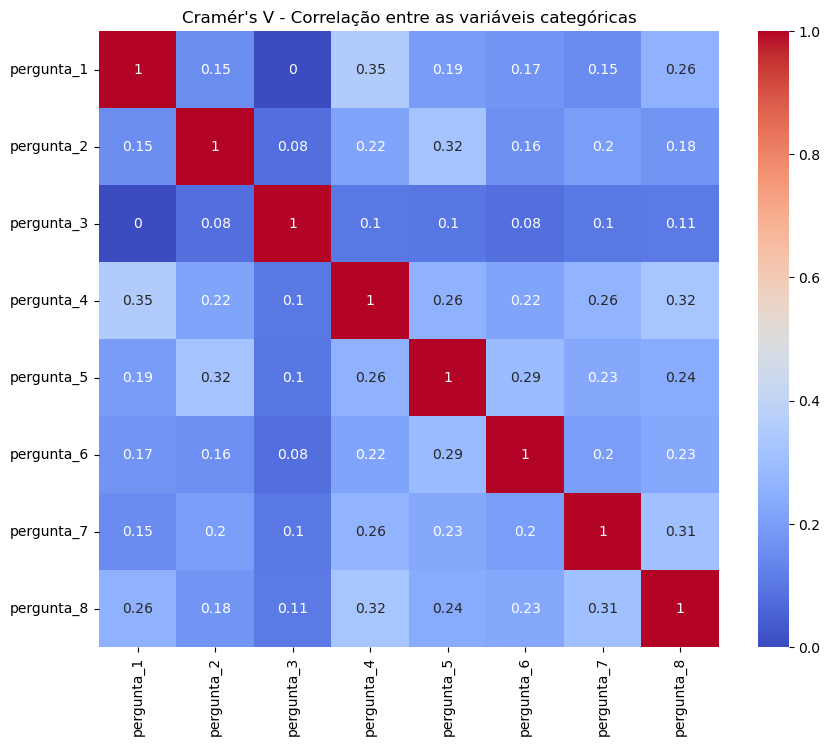

In [22]:
# Visualizando a matriz de correlação
plt.figure(figsize=(10,8))
sns.heatmap(cramers_results, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title("Cramér's V - Correlação entre as variáveis categóricas")
plt.show()

Não possuimos variáveis altamente correlacionadas, mas vamos analisar as três maiores correlações para avaliar a consistência desse dataset

In [23]:
# Transformar a matriz em long format (par variável - valor de correlação)
corr_pairs = (
    cramers_results.where(np.triu(np.ones(cramers_results.shape), k=1).astype(bool))  # pegar só triângulo superior (evita repetição)
    .stack()  # transformar em Series com MultiIndex
    .reset_index()
)
corr_pairs.columns = ['1', '2', 'Cramers_V']
# Ordenar pelas maiores correlações
top_corr = corr_pairs.sort_values(by='Cramers_V', ascending=False).head(3)
print(top_corr)

             1           2  Cramers_V
2   pergunta_1  pergunta_4   0.353861
21  pergunta_4  pergunta_8   0.324603
9   pergunta_2  pergunta_5   0.319514


In [24]:
# Correlação entre perguntas 1 e 4
perguntas_dict["pergunta_1"]["texto"], perguntas_dict["pergunta_4"]["texto"]

('Nível de clareza sobre o casamento dos sonhos: Como vocês descreveriam o nível de clareza que têm sobre o casamento que desejam?',
 'Nível de organização do planejamento: Como vocês estão se organizando para planejar o casamento?')

Essa correlação faz sentido pois quem tem clareza sobre o casamento que deseja tende a estar mais organizado em relação ao planejamento.

In [25]:
# Correlação entre perguntas 4 e 8
perguntas_dict["pergunta_4"]["texto"], perguntas_dict["pergunta_8"]["texto"]

('Nível de organização do planejamento: Como vocês estão se organizando para planejar o casamento?',
 'Comprometimento em tornar esse sonho realidade: O quanto vocês estão comprometidos em transformar esse sonho em realidade?')

Essa correlação também faz sentido pois quem está mais organizado estará mais comprometido em realizar o casamento

In [26]:
# Correlação entre perguntas 2 e 5
perguntas_dict["pergunta_2"]["texto"], perguntas_dict["pergunta_5"]["texto"]

('Situação financeira atual: Como você descreveria a situação financeira atual de vocês dois?',
 'Possibilidade de investimento atual no casamento: Se fossem realizar o casamento ideal hoje, como pagariam?')

Essas perguntas também possuem uma correlação justificavel pois a depender da sitação financeira do casal impactará diretamente na possibilidade de investimento atual no casamento.

#### **Conclusão**

- Não existem relações muito fortes entre as perguntas, o que é esperado em questionários bem desenhados onde as perguntas medem aspectos distintos, mesmo que relacionados (não há alto risco de multicolinearidade.).
- As maiores correlações são classificadas como moderadas ou fracas, indicando que cada pergunta captura aspectos diferentes do perfil ou situação dos leads.

Ainda aplicaresmo o PCA  para redução de dimensionalidade, mas não é obrigatória por questões de multicolinearidade entre as variáveis, e sim pois temos ineresse em reduzir complexidade computacional e melhorar a eficiência do KNN em espaços de alta dimensionalidade.

### Aplicação do One-Hot-Encoding 

Como temos muitas features e precisamos alimentar o algoritimo com variáveis numéricas, aplicaremos OHE com a o paramêtro drop_firtst=True. o OHE transforma variáveis categóricas em formato numérico binário, essencial para algoritmos que não lidam nativamente com categorias como é o caso do KMeans.

**Aplicando One-Hot Encoding com drop_first=True**

In [27]:
# Instanciando o codificador
ohe = OneHotEncoder(drop='first', sparse=False)
# Ajustando e transformando os dados
ohe_array = ohe.fit_transform(df_gf)
# Pegando os nomes das colunas geradas pelo OHE
ohe_columns = ohe.get_feature_names_out(df_gf.columns)
# Criando um novo DataFrame com os dados codificados
df_gf_ohe = pd.DataFrame(ohe_array, columns=ohe_columns, index=df_gf.index)
# Visualizando amostra aleatória de 10 linhas
df_gf_ohe.sample(10)

,pergunta_1_B,pergunta_1_C,pergunta_1_D,pergunta_2_B,pergunta_2_C,pergunta_2_D,pergunta_3_B,pergunta_3_C,pergunta_3_D,pergunta_4_B,...,pergunta_5_D,pergunta_6_B,pergunta_6_C,pergunta_6_D,pergunta_7_B,pergunta_7_C,pergunta_7_D,pergunta_8_B,pergunta_8_C,pergunta_8_D
288,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
64,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
264,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
464,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
19,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
551,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
388,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
391,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
622,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Podemos visualizar o uso do parâmetro drop='first' que remove a primeira categoria de cada variável para diminuir a dimensionaliade, temos 24 features no lugar de 32.

### Aplicação do PCA

A Análise de Componentes Principais (PCA - Principal Component Analysis) é uma técnica estatística de redução de dimensionalidade que transforma um conjunto de variáveis possivelmente correlacionadas em um novo conjunto de variáveis não correlacionadas, chamadas de componentes principais.

O objetivo para o nosso projeto é capturar o máximo de variabilidade dos dados nos primeiras componentes e facilitar visualização, clustering, classificação e reduzir ruído. O OHE gera um aumento considerável da dimensionalidade (no caso desse projeto, de 8 perguntas para 24 variáveis após `drop_first=True`). E quanto maior a dimensionalidade, mais espaço vazio há nos dados, levando à Maldição da Dimensionalidade, que afeta a performance do algoritimo KMeans

**Aplicando o PCA**

In [28]:
# Padronizando os dados
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_gf_ohe)
# Instanciando o PCA
pca = PCA()
# Ajustando o PCA aos dados
pca.fit(df_scaled)
# Gerando os componentes principais
df_pca = pca.transform(df_scaled)
# Convertendo em DataFrame para visualização
df_pca = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(df_pca.shape[1])])
# Visualizando as 5 primeiras linhas
print(df_pca.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.894431  2.735178 -0.826413  3.137230 -0.409440  0.161323 -0.650989   
1  2.981389 -1.378394  0.998942 -1.971190  0.027095 -1.719077 -1.687937   
2 -1.231628 -0.908463 -0.152123 -0.419888  0.238578  0.347453 -0.037611   
3 -1.217156 -0.110358 -1.339276 -0.422707 -0.274758  0.304763 -1.688694   
4 -1.842543 -1.716992 -1.497125  0.169806 -0.275240 -0.392597  0.011479   

        PC8       PC9      PC10  ...      PC15      PC16      PC17      PC18  \
0 -0.982705 -0.015318 -2.118046  ... -1.322269 -1.216456  0.611138 -1.027353   
1  1.375810  0.359631  1.131436  ... -1.148633  1.284379  2.483504  0.253910   
2  0.819806 -0.162855 -0.752639  ...  1.033716 -0.966877  0.895287 -0.054726   
3 -1.809124  0.729512  0.755415  ... -0.506001  0.649595 -1.187464 -0.104447   
4 -0.020066 -0.155247  0.608450  ...  0.350160  0.626633  0.647278  1.009298   

       PC19      PC20      PC21      PC22      PC23      PC24  
0 -0

O resultado da análise de componentes principais tem como inuito nos dar base para decidirmos quantas variáveis iremos utilizar e quanta variância total conseguimos explicar nesse dataset. Portanto devemos escolher entre 01 a 24 PCs e tomar uma decisão com base em "quanto queremos explicar desses dados", ou seja o mínimo de componentes necessários para ter máximo de interpretabilidade. 

In [29]:
# Dados da variância explicada
variancia_acumulada = np.cumsum(pca.explained_variance_ratio_)
# Criando a figura
fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=list(range(1, len(variancia_acumulada) + 1)),
        y=variancia_acumulada,
        mode='lines+markers',
        line=dict(dash='dash', width=2),
        marker=dict(size=8, color='blue'),
        name='Variância Acumulada'
    )
)
fig.update_layout(
    title='Scree Plot - Variância Explicada pelo PCA',
    xaxis_title='Número de Componentes',
    yaxis_title='Variância Explicada Acumulada',
    template='plotly_white',
    width=800,
    height=500
)
fig.show()

In [30]:
# Visualizando a variância explicada por cada componente
for i, var in enumerate(pca.explained_variance_ratio_):
    print(f'PC{i+1}: {var:.4f} ({np.cumsum(pca.explained_variance_ratio_)[i]:.4f} acumulado)')

PC1: 0.1376 (0.1376 acumulado)
PC2: 0.0901 (0.2277 acumulado)
PC3: 0.0755 (0.3032 acumulado)
PC4: 0.0613 (0.3645 acumulado)
PC5: 0.0573 (0.4218 acumulado)
PC6: 0.0536 (0.4755 acumulado)
PC7: 0.0514 (0.5268 acumulado)
PC8: 0.0490 (0.5759 acumulado)
PC9: 0.0462 (0.6220 acumulado)
PC10: 0.0445 (0.6666 acumulado)
PC11: 0.0409 (0.7074 acumulado)
PC12: 0.0392 (0.7466 acumulado)
PC13: 0.0354 (0.7820 acumulado)
PC14: 0.0344 (0.8164 acumulado)
PC15: 0.0306 (0.8470 acumulado)
PC16: 0.0286 (0.8755 acumulado)
PC17: 0.0276 (0.9031 acumulado)
PC18: 0.0230 (0.9261 acumulado)
PC19: 0.0190 (0.9452 acumulado)
PC20: 0.0150 (0.9601 acumulado)
PC21: 0.0120 (0.9721 acumulado)
PC22: 0.0112 (0.9833 acumulado)
PC23: 0.0106 (0.9939 acumulado)
PC24: 0.0061 (1.0000 acumulado)


Optamos por utilizar 17 componentes principais, que preservam 90,31% da variância total do dataset, garantindo um equilíbrio entre simplificação dos dados e manutenção da informação. Esse valor foi determinado com base na análise do scree plot e da distribuição acumulada de variância, que mostra ausência de cotovelo claro, característico de dados categóricos. Essa estratégia permite acelerar o processamento, melhorar a performance do modelo e ainda manter robustez analítica.

### Definindo o Valor de K em Modelos de Clusterização

O algoritmo KMeans é uma técnica de agrupamento de dados que organiza um conjunto de pontos em grupos (ou "clusters") com base em suas semelhanças. Imagine que você tem vários pontos espalhados em um espaço e quer agrupá-los em conjuntos que sejam semelhantes entre si. A escolha do valor adequado de k é uma etapa importante do trabalho que estamos fazendo, pois pode afetar significativamente a utilidade dos clusters formados, para isso utlizaremos o Elbow Method (Método do Cotovelo) e o Silhouette Score para auxiliar a definir um bom valor para k.

**Definindo o valor ideal de K**

In [31]:
# Gerando Dataset com 17 componentes principais
pca = PCA(n_components=17)
df_pca = pca.fit_transform(df_gf_ohe)

In [32]:
# Método do Cotovelo
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_pca)
    inertia.append(kmeans.inertia_)
# Plot do Elbow
fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=list(K_range),  # Convertendo range para lista
        y=inertia,
        mode='lines+markers',
        marker=dict(size=8, color='blue'),
        line=dict(width=2),
        name='Inertia'
    )
)
fig.update_layout(
    title='Método do Cotovelo',
    xaxis_title='Número de Clusters (K)',
    yaxis_title='Inertia',
    template='plotly_white',
    width=800,
    height=500
)
fig.show()

Interpretação: avalia a soma das distâncias quadráticas internas aos clusters (Soma dos Erros Quadrados - SSE) em função de diferentes valores de **k**. À medida que **k** aumenta, o erro diminui, pois os clusters ficam menores e mais específicos. No gráfico de **SSE vs. k**, busca-se o ponto onde há uma "quebra" ou "dobra" (um cotovelo). Esse ponto indica que aumentar **k** além dali traz ganhos marginais na redução do erro, sinalizando o número ótimo de clusters.

Conseguimos ver onde a curva forma um cotovelo entre os valores 2 e 3, sendo o valor k=2 um pouco mais acentuado em sua curvatura sugerindo o melhor valor de K, porém não fica muito distinto para k=3

In [33]:
# Análise do Índice de Silhouette
silhouette_scores = []
K_range_sil = range(2, 11)
for k in K_range_sil:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_pca)
    score = silhouette_score(df_pca, labels)
    silhouette_scores.append(score)
# Agora, o código Plotly para o gráfico do Índice de Silhouette:
fig_silhouette = go.Figure()
fig_silhouette.add_trace(
    go.Scatter(
        x=list(K_range_sil),
        y=silhouette_scores,
        mode='lines+markers',
        marker=dict(
            size=8,
            color='blue',
            symbol='circle'
        ),
        line=dict(
            width=2,
            color='blue'
        ),
        name='Silhouette Score'
    )
)

fig_silhouette.update_layout(
    title='Análise do Índice de Silhouette',
    xaxis_title='Número de Clusters (K)',
    yaxis_title='Silhouette Score',
    template='plotly_white',
    width=800,
    height=500
)

fig_silhouette.show()

In [34]:
# Verificando os valores de silhouette
for k, score in zip(K_range_sil, silhouette_scores):
    print(f"K={k}: Silhouette Score={score:.4f}")

K=2: Silhouette Score=0.1199
K=3: Silhouette Score=0.1239
K=4: Silhouette Score=0.1017
K=5: Silhouette Score=0.0961
K=6: Silhouette Score=0.1023
K=7: Silhouette Score=0.1044
K=8: Silhouette Score=0.0939
K=9: Silhouette Score=0.1094
K=10: Silhouette Score=0.1023


Interpretação: Os valoresm medem a qualidade dos clusters calculando o quão semelhante um ponto é ao seu próprio cluster em comparação com outros clusters. O valor varia entre **-1** (má agrupamento) e **1** (ótimo agrupamento).Aqui consiguimos visualizar  o melhor valor para k=3, mas muito próximo para k=2.

### Resultados e decisão

**Método do Cotovelo - K = 2**
O cotovelo mostra onde a redução da inércia começa a se estabilizar.

Interpretação prática: Os dados podem ter duas macro estruturas, ou seja, uma divisão mais grosseira.

**Silhouette - Melhor em K = 3**
O maior valor de silhouette (0.1239) ocorre com K=3.

Vamos utilizar k = 2 e k=3 e analisar qual algoritimo melhor se encaixa para nosso projeto

**Aplicando Algoritimo KMeans**

In [35]:
# Aplicar KMeans para k=2
kmeans_k2 = KMeans(n_clusters=2, random_state=42)
clusters_k2 = kmeans_k2.fit_predict(df_pca)
# DataFrame com clusters K=2
df_clusters_k2 = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(df_pca.shape[1])])
df_clusters_k2['Cluster'] = clusters_k2
# Aplicar KMeans para K=3
kmeans_k3 = KMeans(n_clusters=3, random_state=42)
clusters_k3 = kmeans_k3.fit_predict(df_pca)
# DataFrame com clusters K=3
df_clusters_k3 = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(df_pca.shape[1])])
df_clusters_k3['Cluster'] = clusters_k3

In [36]:
# Avaliação Quantitativa dos dois modelos -- Silhouete Score
silhouette_k2 = silhouette_score(df_pca, clusters_k2)
silhouette_k3 = silhouette_score(df_pca, clusters_k3)
print(f'Silhouette Score K=2: {silhouette_k2}')
print(f'Silhouette Score K=3: {silhouette_k3}')

Silhouette Score K=2: 0.11988114338535223
Silhouette Score K=3: 0.12394148922394936


In [37]:
## Distribuição dos Clusters
print("\nDistribuição dos Clusters - K=2")
print(pd.Series(clusters_k2).value_counts())

print("\nDistribuição dos Clusters - K=3")
print(pd.Series(clusters_k3).value_counts())


Distribuição dos Clusters - K=2
1    252
0    243
Name: count, dtype: int64

Distribuição dos Clusters - K=3
1    234
0    206
2     55
Name: count, dtype: int64


In [38]:
# Grafico Comparativo de K2 e k3
fig = make_subplots(rows=1, cols=2, subplot_titles=('Clusters com K=2', 'Clusters com K=3'))
unique_clusters_k2 = sorted(df_clusters_k2['Cluster'].unique())
if len(unique_clusters_k2) > 1:
    colors_k2 = pcolors.sample_colorscale("Viridis", np.linspace(0, 1, len(unique_clusters_k2)))
elif len(unique_clusters_k2) == 1:
    colors_k2 = [pcolors.sample_colorscale("Viridis", 0.5)[0]]
else:
    colors_k2 = []
for i, cluster_val in enumerate(unique_clusters_k2):
    df_subset = df_clusters_k2[df_clusters_k2['Cluster'] == cluster_val]
    fig.add_trace(go.Scatter(
        x=df_subset['PC1'],
        y=df_subset['PC2'],
        mode='markers',
        marker=dict(
            color=colors_k2[i],
            opacity=0.7,
            size=7
        ),
        name=f'K=2, Cluster {cluster_val}',
        legendgroup='k2_group'
    ), row=1, col=1)
unique_clusters_k3 = sorted(df_clusters_k3['Cluster'].unique())
qualitative_palette_for_k3 = pcolors.qualitative.Plotly
if len(unique_clusters_k3) > 0:
    colors_k3 = [qualitative_palette_for_k3[j % len(qualitative_palette_for_k3)] for j in range(len(unique_clusters_k3))]
else:
    colors_k3 = []

for i, cluster_val in enumerate(unique_clusters_k3):
    df_subset = df_clusters_k3[df_clusters_k3['Cluster'] == cluster_val]
    fig.add_trace(go.Scatter(
        x=df_subset['PC1'],
        y=df_subset['PC2'],
        mode='markers',
        marker=dict(
            color=colors_k3[i],
            opacity=0.7,
            size=7
        ),
        name=f'K=3, Cluster {cluster_val}',
        legendgroup='k3_group'
    ), row=1, col=2)
fig.update_xaxes(title_text="PC1", row=1, col=1)
fig.update_yaxes(title_text="PC2", row=1, col=1)
fig.update_xaxes(title_text="PC1", row=1, col=2)
fig.update_yaxes(title_text="PC2", row=1, col=2)
fig.update_layout(
    width=1300,
    height=550,
    legend_title_text='Legenda dos Clusters',
    hovermode='closest'
)
fig.show()

Plotando o centro de cada cluster

In [39]:
# Grafico para plotar o centro de cada cluster
cluster_colors = ['red', 'blue', 'green']
fig = go.Figure()
unique_clusters = sorted(df_clusters_k3['Cluster'].unique())
for cluster_idx, cluster_num in enumerate(unique_clusters):
    mask = df_clusters_k3['Cluster'] == cluster_num
    fig.add_trace(go.Scatter(
        x=df_clusters_k3.loc[mask, df_clusters_k3.columns[0]],
        y=df_clusters_k3.loc[mask, df_clusters_k3.columns[1]],
        mode='markers',
        marker=dict(
            color=cluster_colors[cluster_idx % len(cluster_colors)],
            opacity=0.7,
            size=8
        ),
        name=f'Cluster {cluster_num}'
    ))
fig.add_trace(go.Scatter(
    x=kmeans_k3.cluster_centers_[:, 0],
    y=kmeans_k3.cluster_centers_[:, 1],
    mode='markers',
    marker=dict(
        size=16,
        color='black',
        symbol='x'
    ),
    name='Centróides'
))
fig.update_layout(
    title="Cluster Plot",
    xaxis_title=df_clusters_k3.columns[0] if len(df_clusters_k3.columns) > 0 else 'Componente 1',
    yaxis_title=df_clusters_k3.columns[1] if len(df_clusters_k3.columns) > 1 else 'Componente 2',
    legend_title_text='Legenda',
    width=900,
    height=650,
)
fig.show()

### Escolha de K=3

Embora a métrica de Silhouette seja apenas levemente superior em K=3 (0.1239) comparado a K=2 (0.1198), ela ainda sugere que o modelo com três clusters oferece uma divisão mais refinada dos perfis comportamentais dos respondentes.

Os gráficos PCA 2D mostra alguma sobreposição entre os clusters (consistente com os baixos scores de silhueta), mas também revela que os centros dos clusters estão em posições distintas, indicando que o K-Means conseguiu encontrar padrões diferentes e indicando que os grupos capturam diferenças relevantes nos perfis de comportamento.

### Interpretação dos Clusters e Geração de Insights

In [40]:
# Obtendo e visualuando os os centroides (valores próximos de 1 indicam forte presença da variável binária)
centroids_pca = kmeans_k3.cluster_centers_
centroids_ohe = pca.inverse_transform(centroids_pca)
centroids_df = pd.DataFrame(centroids_ohe, columns=ohe.get_feature_names_out())
print(centroids_df)

   pergunta_1_B  pergunta_1_C  pergunta_1_D  pergunta_2_B  pergunta_2_C  \
0      0.263288      0.248406      0.098141      0.387035      0.193359   
1      0.219534      0.280162      0.095265      0.474151      0.123222   
2      0.025306      0.041283      0.881655      0.205811      0.278800   

   pergunta_2_D  pergunta_3_B  pergunta_3_C  pergunta_3_D  pergunta_4_B  ...  \
0      0.029919      0.223320      0.183665      0.055479      0.387110  ...   
1      0.069168      0.212591      0.204563      0.059880      0.330362  ...   
2      0.357298      0.204543      0.205405      0.155626      0.071828  ...   

   pergunta_5_D  pergunta_6_B  pergunta_6_C  pergunta_6_D  pergunta_7_B  \
0      0.049661      0.012986      0.641069      0.119277      0.205592   
1      0.041706      0.984988     -0.012480     -0.018666      0.196746   
2      0.472921      0.215230      0.397455      0.378123      0.138356   

   pergunta_7_C  pergunta_7_D  pergunta_8_B  pergunta_8_C  pergunta_8_D  
0  

In [41]:
# Junta o cluster ao dataframe original
df_clusters = df_gf.copy()
df_clusters['Cluster'] = clusters_k3
titulos_perguntas = {
    'pergunta_1': 'Nível de clareza',
    'pergunta_2': 'Situação financeira atual',
    'pergunta_3': 'Apoio e envolvimento',
    'pergunta_4': 'Nível de organização do planejamento',
    'pergunta_5': 'Possibilidade de investimento atual',
    'pergunta_6': 'Estilo de casamento desejado',
    'pergunta_7': 'Planejamento da lua de mel',
    'pergunta_8': 'Comprometimento em tornar realidade'
}
perguntas = df_gf.columns.tolist()
num_perguntas = len(perguntas)
n_rows = 2
n_cols = 4
subplot_titles_list = []
for i in range(n_rows * n_cols):
    if i < num_perguntas:
        pergunta_nome = perguntas[i]
        titulo = titulos_perguntas.get(pergunta_nome, pergunta_nome)
        subplot_titles_list.append(f'{titulo} ')
    else:
        subplot_titles_list.append('')
fig = make_subplots(
    rows=n_rows,
    cols=n_cols,
    subplot_titles=subplot_titles_list
)
palette = qualitative.Vivid
unique_cluster_values = sorted(df_clusters['Cluster'].unique())
cluster_color_map = {
    cluster_val: palette[i % len(palette)]
    for i, cluster_val in enumerate(unique_cluster_values)
}
for i, pergunta in enumerate(perguntas):
    if i >= n_rows * n_cols:
        break
    row_num = (i // n_cols) + 1
    col_num = (i % n_cols) + 1

    ordem_categorias = df_clusters[pergunta].value_counts().index.tolist()

    for cluster_val in unique_cluster_values:
        df_subset_cluster = df_clusters[df_clusters['Cluster'] == cluster_val]

        counts = df_subset_cluster[pergunta].value_counts()
        y_values = [counts.get(cat, 0) for cat in ordem_categorias]

        fig.add_trace(go.Bar(
            x=ordem_categorias,
            y=y_values,
            name=f'Cluster {cluster_val}',
            marker_color=cluster_color_map[cluster_val],
            showlegend=(i == 0)
        ), row=row_num, col=col_num)
    fig.update_xaxes(
        type='category',
        categoryorder='array',
        categoryarray=ordem_categorias,
        tickangle=0,
        showticklabels=True,
        row=row_num,
        col=col_num
    )
    fig.update_yaxes(
        title_text='Frequência',
        row=row_num,
        col=col_num
    )
fig.update_layout(
    height=800,
    width=1600,
    barmode='group',
    legend_title_text='Cluster',
    template='plotly_white'
)
fig.show()

In [42]:
# Calculando a média de respostas por cluster -- as 5 primeiras
df_encoded = pd.get_dummies(df_clusters.drop('Cluster', axis=1), prefix_sep='_', drop_first=False)
df_encoded['Cluster'] = df_clusters['Cluster']
centroids = df_encoded.groupby('Cluster').mean()
fig = make_subplots(
    rows=1, 
    cols=3, 
    subplot_titles=[f"Cluster {i}" for i in centroids.index],
    specs=[[{"type": "table"}]*3]
)
for i, cluster in enumerate(centroids.index):
    top5 = centroids.loc[cluster].sort_values(ascending=False).head(5)

    fig.add_trace(
        go.Table(
            header=dict(
                values=["Resposta", "Proporção"],
                fill_color="lightgrey",
                align="left",
                font=dict(color="black", size=12)
            ),
            cells=dict(
                values=[top5.index, top5.values.round(3)],
                align="left",
                height=30
            )
        ),
        row=1, col=i+1
    )
fig.update_layout(
    height=370, 
    width=1200,
    title_text="Top 5 respostas mais representativas por Cluster",
    title_x=0.5,
    template="plotly_white"
)
fig.show()


Com base na análise dos centroides, que representam os valores médios (proporções de escolha) de cada resposta dentro de cada cluster, podemos interpretar que:

- Quanto mais próximo de 1, mais predominante é essa característica no grupo.

- Cada valor varia de 0 a 1 e representa a frequência relativa com que aquela opção foi escolhida dentro do cluster.

Esse método nos permite entender o perfil médio e as prioridades de cada segmento.

##  **Interpretação dos Clusters**

### Segmento 1: 206 leads (Cluster 0 - 42%)

##### Perfil Detalhado:
* Estilo de Casamento (Pergunta 6): Desejam "Uma cerimônia encantadora, com tudo bem feito", mas não necessariamente o mais luxuoso (🔸 pergunta_6_C – 62.6%).
* Apoio do Parceiro (Pergunta 3): O parceiro(a) "Está completamente envolvido(a), sonha junto comigo" (🔸 pergunta_3_A – 53.4%).
* Planejamento da Lua de Mel (Pergunta 7): A grande maioria "Nem pensamos nisso ainda" (🔸 pergunta_7_A – 49.0%).
* Possibilidade de Investimento (Pergunta 5): Sentem que "Não conseguiríamos bancar nada ainda" se o casamento fosse hoje (🔸 pergunta_5_A – 46.1%).
* Nível de Organização (Pergunta 4): Ainda "Não começamos ainda" o planejamento (🔸 pergunta_4_A – 44.7%).

##### Resumo do Comportamento:
* Este grupo, um dos maiores, está em um estágio muito inicial. Têm sonhos e desejos claros sobre o estilo da cerimônia e contam com forte apoio mútuo no casal.
* No entanto, enfrentam uma paralisia prática devido à falta de organização e, crucialmente, à percepção de incapacidade financeira no momento.
* Estão sonhando alto, mas se sentem perdidas sobre por onde começar, com o orçamento e a organização sendo os principais gargalos.

##### Necessidades:
* Guias práticos e passo a passo: "Do zero ao casamento dos sonhos: um guia para iniciantes".
* Ferramentas básicas de organização: checklists simples, cronogramas iniciais, modelos de planilhas de orçamento para iniciantes.
* Soluções e ideias para casamentos acessíveis: Conteúdo sobre como realizar uma cerimônia encantadora com orçamento limitado.
* Conteúdo emocional e motivacional: Que reforce que é normal sentir-se perdido no início e que é possível transformar o sonho em realidade com planejamento, mesmo com recursos limitados.

---

### Segmento 2: 234 leads (Cluster 1 — 47%)

##### Perfil Detalhado:

* Estilo de Casamento (Pergunta 6): Predominantemente, desejam "Algo íntimo e simples, só com pessoas próximas" (🔸 pergunta_6_B – 99.6%). Este é o traço mais marcante deste grupo.
* Possibilidade de Investimento (Pergunta 5): A maioria acredita que "Conseguiríamos fazer algo simples" se fossem realizar o casamento hoje (🔸 pergunta_5_B – 62.4%).
* Nível de Organização (Pergunta 4): Uma parcela significativa "Não começamos ainda" o planejamento (🔸 pergunta_4_A – 57.3%).
* Planejamento da Lua de Mel (Pergunta 7): A maioria "Nem pensamos nisso ainda" (🔸 pergunta_7_A – 56.8%).
* Apoio do Parceiro (Pergunta 3): O parceiro(a) "Está completamente envolvido(a), sonha junto comigo" (🔸 pergunta_3_A – 51.7%).

##### Resumo do Comportamento:

* Este é o maior grupo e caracteriza-se por um desejo claro por um casamento mais simples e intimista.
* Financeiramente, sentem-se capazes de realizar um evento modesto, mas ainda não iniciaram a organização prática nem o planejamento da lua de mel.
* O envolvimento do parceiro é alto, indicando um sonho compartilhado.
*Apesar da simplicidade desejada, a falta de início no planejamento sugere uma necessidade de orientação para dar os primeiros passos, mesmo para um evento menor.

##### Necessidades:

* Ideias e inspirações para casamentos simples, elegantes e econômicos.
* Ferramentas de planejamento focadas em eventos menores e mais objetivos.
* Direcionamento sobre como começar a planejar um casamento intimista sem complicação.
* Conteúdo que valide a escolha por um casamento menor, mostrando seus benefícios e charme.

---

### Segmento 3: 55 leads (Cluster 2 — 11%)

##### Perfil Detalhado:

* Nível de Clareza (Pergunta 1): Têm um nível de clareza muito alto: "Sabemos exatamente o que queremos e já começamos a organizar" (🔸 pergunta_1_D – 89.1%).
* Comprometimento (Pergunta 8): Estão altamente comprometidas: "Estamos prontos, queremos agir e realizar de verdade" (🔸 pergunta_8_D – 85.5%).
* Nível de Organização (Pergunta 4): Já estão bem organizadas: "Temos planilhas, metas e até cronograma definido" (🔸 pergunta_4_D – 58.2%).
* Possibilidade de Investimento (Pergunta 5): Acreditam que "Poderíamos arcar com boa parte, mas queremos mais liberdade" financeira (🔸 pergunta_5_D – 49.1%).
* Apoio do Parceiro (Pergunta 3): O parceiro(a) "Está completamente envolvido(a), sonha junto comigo" (🔸 pergunta_3_A – 47.3%).

##### Resumo do Comportamento:

* Este é o menor grupo, mas representa as noivas mais decididas e proativas.
* Possuem clareza total sobre o casamento desejado, estão altamente comprometidas e já possuem um planejamento avançado.
* Financeiramente, estão em uma posição relativamente confortável, mas buscam otimizar seus recursos para ter "mais liberdade".
* O apoio do parceiro também é forte, indicando um esforço conjunto e alinhado.
* Provavelmente já pesquisaram bastante e podem estar buscando otimizar o que já planejaram ou encontrar fornecedores e soluções que se encaixem em sua visão clara.

##### Necessidades:

* Soluções para otimizar o orçamento e maximizar o valor do investimento.
* Ferramentas avançadas de gerenciamento de fornecedores ou cronogramas detalhados.
* Consultoria especializada para refinar detalhes ou resolver pontos específicos do planejamento.
* Inspiração para toques finais ou elementos diferenciados que agreguem valor ao casamento já bem delineado.
* Confirmação de que estão no caminho certo e acesso a fornecedores de confiança.

In [43]:
# 1. Calcula as contagens de leads em cada cluster e plota no gráfico
cluster_counts = df_clusters['Cluster'].value_counts().sort_index()
vivid_palette_px = px.colors.qualitative.Vivid
bar_colors = [vivid_palette_px[i % len(vivid_palette_px)] for i in range(len(cluster_counts.index))]
fig = go.Figure()
fig.add_trace(go.Bar(
    x=cluster_counts.index.astype(str),
    y=cluster_counts.values,
    marker_color=bar_colors,
    text=cluster_counts.values,
    texttemplate='%{y}',
    textposition='outside',
    textfont=dict(size=10, color='black')
))
fig.update_layout(
    title=dict(
        text='Número de Leads por Cluster',
        font=dict(size=16),
        x=0.5,
        xanchor='center'
    ),
    xaxis_title='Cluster',
    yaxis_title='Número de Leads',
    xaxis=dict(
        tickangle=0,
        type='category'
    ),
    yaxis=dict(
        showgrid=True,
        gridcolor='rgba(211, 211, 211, 0.7)',
        griddash='dash',
        gridwidth=1,
        range=[0, cluster_counts.values.max() * 1.15]
    ),
    width=800,
    height=600,
    plot_bgcolor='white',
    font=dict(size=12)
)
fig.show()

###  **Resumo dos Segmentos**

| Cluster | Quantidade de leads      | Estilo                  | Organização       | Investimento         | Emoção/Comprometimento    |
| ------- | ------------------------ | ----------------------- | ----------------- | -------------------- | ------------------------- |
| 0       |       206                | Encantador, mas perdido | Não começaram     | Não conseguem bancar | Sonham, mas perdidas      |
| 1       |       234                | Simples e íntimo        | Ideias soltas     | Algo simples         | Sonham juntos, cautelosos |
| 2       |       55                 | Encantador a grandioso  | Extremamente alto | Conseguem bancar bem | Altíssimo compromisso     |

✅ A proposta de segmentação mostra claramente três perfis muito distintos, com necessidades, desejos e condições diferentes.

✅ A utilização do KMeans com K=3 foi a mais adequada, pois capturou:

Dois grandes grupos com foco em simplicidade, porém com diferenças sutis no grau de organização e insegurança.

Um grupo menor, mas muito valioso, de clientes de alta conversão e maior ticket médio.

✅ Esta segmentação permite construir jornadas de marketing personalizadas, aumentando tanto as taxas de conversão quanto a satisfação dos clientes.